# Decision Tree and Random Forest
## Author : Ashish Kumar Patra

## Import the Required Libraries

In [2]:
# Filtering out the warnings and importing the required libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,accuracy_score,f1_score,roc_auc_score
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

## Attribute Information: ( Classes : edible = e, poisonous = p )

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


## Load the Dataset and Analyse
### 1. Load the Dataset ( mushrooms.csv )

In [4]:
df = pd.read_csv('C:\\Users\\ASHISH\\Desktop\\DataSets\\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 2. Check the Size of Data

In [5]:
df.shape

(8124, 23)

### 3. Check various DataType

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 4. Check Statistical Information of Data

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 5. Check the Distribution of the Target Class using Countplot

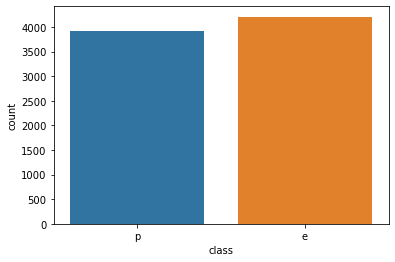

In [9]:
sns.countplot('class', data=df)
plt.show()

Here the data is almost evenly distributed.

### 6. a)  Apply LabelEncoder for Target Variable

In [11]:
le = preprocessing.LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 7. Try the Pairplot , we can find there is no use of plotting that.

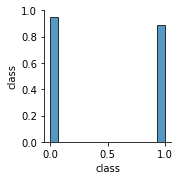

In [13]:
sns.pairplot(df)
plt.show()

### 8. Since these are Categorical Variables without any Definite Order ( Nominal Variables ), Dummy Variables has to be created for all the  Categorical Variables.

In [15]:
df.iloc[:,1:] = df.iloc[:,1:].apply(le.fit_transform)
df['class'] = df['class'].astype('category')

In [16]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   int32   
 2   cap-surface               8124 non-null   int32   
 3   cap-color                 8124 non-null   int32   
 4   bruises                   8124 non-null   int32   
 5   odor                      8124 non-null   int32   
 6   gill-attachment           8124 non-null   int32   
 7   gill-spacing              8124 non-null   int32   
 8   gill-size                 8124 non-null   int32   
 9   gill-color                8124 non-null   int32   
 10  stalk-shape               8124 non-null   int32   
 11  stalk-root                8124 non-null   int32   
 12  stalk-surface-above-ring  8124 non-null   int32   
 13  stalk-surface-below-ring  8124 non-null   int32 

### 9. Extract the Independent Variable X and Dependent Variable Y.

In [18]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

### 10. Split Data into Train and Test ( 70 / 30 )

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=99)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5686, 22)
(5686,)
(2438, 22)
(2438,)


### 11. Implement Machine Learning Models 
Let us explore the various Classification Algorithms and check which one performs well on this Dataset.
Below are the various different Algorithms we are going to explore.

* Decision Tree

* Random Forest

#### Build the Model for Decision Tree Classifier

In [24]:
dt_default = DecisionTreeClassifier()

In [25]:
dt_default.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
print(confusion_matrix(y_test,dt_default.predict(x_test)))
print(accuracy_score(y_test,dt_default.predict(x_test)))

[[1245    0]
 [   0 1193]]
1.0


#### Build the Model for Random Forest

In [27]:
rf_default = RandomForestClassifier()

In [28]:
rf_default.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
print(confusion_matrix(y_test,rf_default.predict(x_test)))
print(accuracy_score(y_test,rf_default.predict(x_test)))

[[1245    0]
 [   0 1193]]
1.0


We can see both the Models are almost same. So we can say both are the best Model.

## *** We can also use Dummy Variable Encoding instead of Label Encoder

In [30]:
df_dummy = df.copy()

In [31]:
df_dummy.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [32]:
df_dummy.shape

(8124, 23)

In [33]:
df_dummy.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [34]:
df_dummy = pd.get_dummies(df_dummy, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
                          drop_first=True)

In [35]:
df_dummy.shape

(8124, 96)

In [36]:
df_dummy.head()

,class,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
df_dummy['class']=df_dummy['class'].astype('category')

In [38]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 96 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   class                       8124 non-null   category
 1   cap-shape_1                 8124 non-null   uint8   
 2   cap-shape_2                 8124 non-null   uint8   
 3   cap-shape_3                 8124 non-null   uint8   
 4   cap-shape_4                 8124 non-null   uint8   
 5   cap-shape_5                 8124 non-null   uint8   
 6   cap-surface_1               8124 non-null   uint8   
 7   cap-surface_2               8124 non-null   uint8   
 8   cap-surface_3               8124 non-null   uint8   
 9   cap-color_1                 8124 non-null   uint8   
 10  cap-color_2                 8124 non-null   uint8   
 11  cap-color_3                 8124 non-null   uint8   
 12  cap-color_4                 8124 non-null   uint8   
 13  cap-color_5       

We can use either of the method for Encoding.